In [4]:
#This notebook is for visualizing calibrated neural likelihood surfaces for the evaluation data.
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [5]:
#Load the data
version = "final_version"
image_size = 25
image_name = str(image_size) + "_by_" + str(image_size)
local_folder = "/home/juliatest/Desktop/likelihood_free_inference/neural_likelihood/gaussian_process"
fields_file = (local_folder + "/evaluate_nn/produce_neural_likelihood_surfaces/data/" + image_name + "/" + version + 
"/calibrated/single/reps/200/calibrated_neural_likelihood_surfaces_10_by_10_density_" + image_name + "_image_200.npy")
fields = np.load(fields_file)

number_of_parameters = 100
number_of_reps = 200
true_params = [(.2*j, .2*i) for i in range(1,11) for j in range(1,11)]
possible_length_scales = [.05*i for i in range(1, 41)]
possible_variances = [.05*i for i in range(1, 41)]

In [8]:
#Save a png file of the calibrated neural likelihood surface.
#function parameters:
    #calibrated_neural_likelihood_surface: (numpy matrix) calibrated neural likelihood surface for a realization of the GP from
    # evaluation data
    #true_length_scale: the length scale value which generated the realization for this calibrated neural likelihood surface
    #true_variance: the variance value which generated the realization for this calibrated neural likelihood surface
    #possible_length_scales: length scales values on the parameter grid
    #possible_variances: variance values on the parameter grid
    #C: the critical value for around 90 percent coverage according to Wilk's Thrm (multiple realizations) and the range of the
    #color scale (ranges from max of the field to max of the field minus C)
    #rep_number: the replication number that identifies the realization which produced the given calibrated neural likelihood surface
def visualize_calibrated_neural_likelihood_surface(calibrated_neural_likelihood_surface, possible_length_scales, possible_variances,
                                                    true_length_scale, true_variance, rep_number, C):

    fig, ax = plt.subplots(figsize = (10,10))
    x = np.linspace(.05, 2, len(possible_length_scales))
    y = np.linspace(.05, 2, len(possible_variances))
    X, Y = np.meshgrid(x, y)
    Z = calibrated_neural_likelihood_surface
    Z = Z.reshape((40, 40))
    max_indices = np.unravel_index(np.argmax(Z, axis=None), Z.shape)
    max_length_scale = possible_length_scales[max_indices[1]]
    max_variance = possible_variances[max_indices[0]]
    ax.contourf(X, Y, Z, vmin = (np.amax(Z) - C), vmax = np.amax(Z), levels = 12000)
    ax.scatter(true_length_scale, true_variance, s = 600, marker = "*", c = "black")
    ax.scatter(max_length_scale, max_variance, s = 600, marker = "o", c= "red")
    legend_elements = [Line2D([0], [0], marker='*', color='w', label='True',
                          markerfacecolor='black', markersize=40), 
                          Line2D([0], [0], marker='o', color='w', label='Estimate',
                          markerfacecolor='red', markersize=30)]
    ax.legend(handles = legend_elements, facecolor='white', framealpha=1, fontsize="25")
    ax.set_xlabel("length scale", fontsize = 40)
    ax.set_ylabel("variance", fontsize = 40)
    plt.yticks(fontsize=20)
    plt.xticks(fontsize =20)
    plt.tight_layout()
    fig_name = (local_folder + "/evaluate_nn/visualizations/visualize_surfaces/surfaces/" + image_name + 
                "/neural_likelihood/" + version + "/calibrated/single/reps/200/"
                 + str(C) + "_calibrated_neural_likelihood_surface_variance_" + str(round(true_variance, 2))
     + "_length_scale_" + str(round(true_length_scale, 2)) + "_rep_" + str(rep_number) + ".png")
    plt.savefig(fig_name)

Locator attempting to generate 9838 ticks ([-10.437, ..., 4.3185]), which exceeds Locator.MAXTICKS (1000).


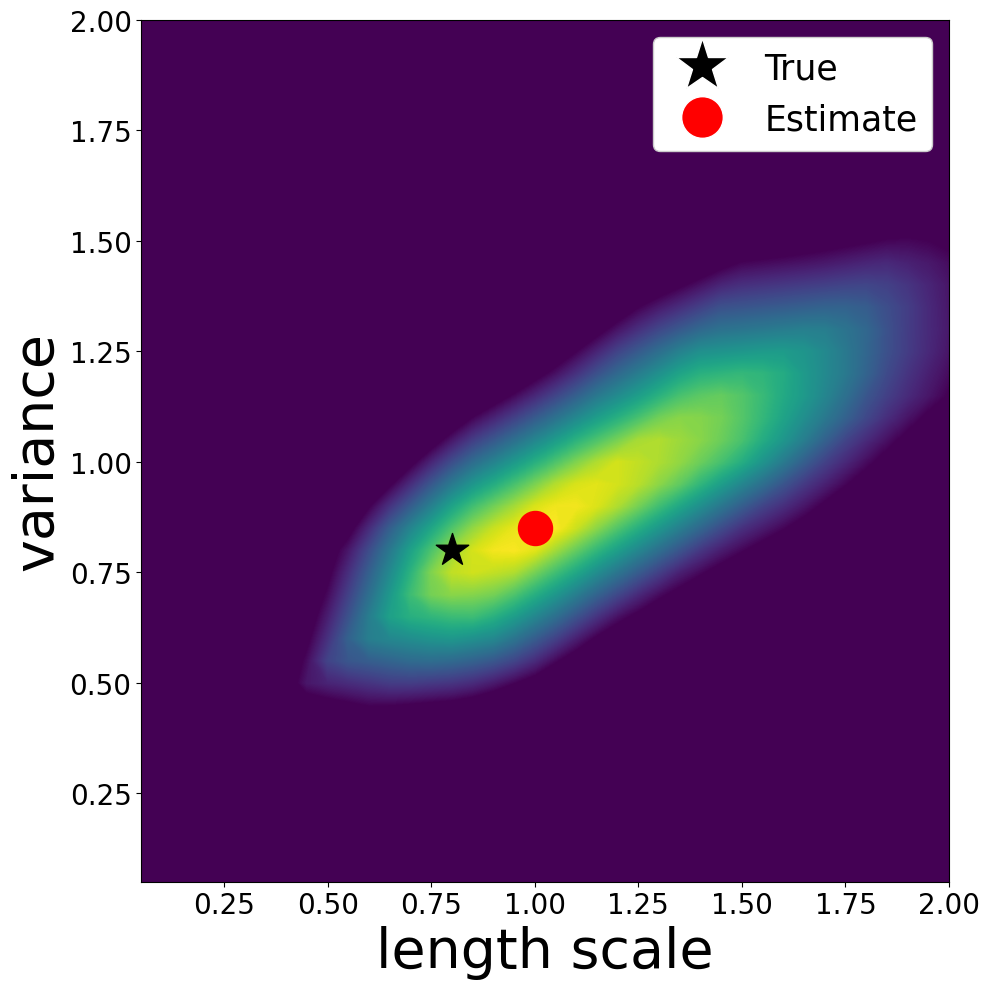

In [9]:
possible_length_scales = [.05*i for i in range(1, 41)]
possible_variances = [.05*i for i in range(1, 41)]
C = 10
indices = [11, 13, 15, 17, 31, 33, 35, 37, 51, 53, 55, 57, 71, 73, 75, 77]
true_params = np.array([(.2*j, .2*i) for i in range(1, 11) for j in range(1, 11)])

for ipred in [33]:
    for irep in range(12,13):
        true_length_scale = (true_params[ipred])[0]
        true_variance = (true_params[ipred])[1]
        field = fields[ipred,irep,:,:]
        field[field == 0] = np.amin(field[field != 0])
        field = np.log(field)
        visualize_calibrated_neural_likelihood_surface(field, possible_length_scales, 
                                                       possible_variances, true_length_scale, true_variance, irep, C)